In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('../data/diam.csv')

In [6]:
data.shape

(53940, 10)

In [7]:
data['target']=data['target'].map({'dewevo': 0, 'dorogo': 1})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
target     53940 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
y = data['target']
X = data.drop('target', axis=1)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [11]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['cut'], 
                                               prefix="cut"),
                      pd.get_dummies(X_train['color'], prefix="color"),
                      pd.get_dummies(X_train['clarity'], prefix="clarity")], axis=1)
X_valid = pd.concat([X_valid, pd.get_dummies(X_valid['cut'], 
                                               prefix="cut"),
                      pd.get_dummies(X_valid['color'], prefix="color"),
                      pd.get_dummies(X_valid['clarity'], prefix="clarity")], axis=1)

In [12]:
X_train.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
X_valid.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

In [13]:
tree = DecisionTreeClassifier(random_state=17)

In [14]:
tree_params = {'max_depth': np.arange(1,11), 'max_features': [.5, .7, 1]}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)

In [15]:
%%time
tree_grid.fit(X_train, y_train)

CPU times: user 843 ms, sys: 329 ms, total: 1.17 s
Wall time: 4.18 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': [0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
tree_grid.best_score_

0.9716351501668521

In [17]:
tree_grid_pred = tree_grid.predict(X_valid)

In [18]:
accuracy_score(y_valid, tree_grid_pred)

0.9728710913360524

In [19]:
export_graphviz(tree_grid.best_estimator_, out_file='diamond.dot', feature_names=X_train.columns, filled=True)

In [20]:
!dot -Tpng diamond.dot -o diamond.png

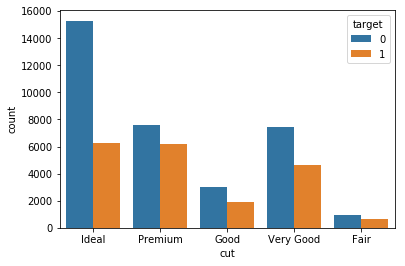

In [21]:
sns.countplot(x='cut', hue='target', data=data)

In [22]:
cross_val_score(tree, X_train, y_train, cv=5)

array([0.96822034, 0.96570445, 0.96716102, 0.96583686, 0.96450331])